# Chapter 13. 텐서플로를 사용하여 신경망 훈련

[ 주제 ]
* 텐서플로를 사용하여 훈련 속도를 높이는 방법 살펴보기
* 텐서플로 2.x에서 최적화된 머신 러닝 코드 작성하기
* 텐서플로의 저수준 API 사용하여 보기
* 텐서플로의 고수준 래퍼인 케라스를 사용하여 딥러닝 구조를 효율적으로 구현하기
* 인공 신경망을 위한 활성화 함수 선택하기

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#13.1-고성능-머신-러닝-라이브러리-텐서플로" data-toc-modified-id="13.1-고성능-머신-러닝-라이브러리-텐서플로-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>13.1 고성능 머신 러닝 라이브러리 텐서플로</a></span><ul class="toc-item"><li><span><a href="#13.1.1-텐서플로란?" data-toc-modified-id="13.1.1-텐서플로란?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>13.1.1 텐서플로란?</a></span></li><li><span><a href="#13.1.2-텐서플로-학습-방법" data-toc-modified-id="13.1.2-텐서플로-학습-방법-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>13.1.2 텐서플로 학습 방법</a></span></li><li><span><a href="#13.1.3-텐서플로-시작" data-toc-modified-id="13.1.3-텐서플로-시작-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>13.1.3 텐서플로 시작</a></span></li><li><span><a href="#13.1.3-배열-구조-다루기" data-toc-modified-id="13.1.3-배열-구조-다루기-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>13.1.3 배열 구조 다루기</a></span></li><li><span><a href="#13.1.5-텐서플로-저수준-API로-간단한-모델-개발" data-toc-modified-id="13.1.5-텐서플로-저수준-API로-간단한-모델-개발-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>13.1.5 텐서플로 저수준 API로 간단한 모델 개발</a></span></li></ul></li><li><span><a href="#13.2-tf.keras-API로-다층-신경망-훈련" data-toc-modified-id="13.2-tf.keras-API로-다층-신경망-훈련-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>13.2 tf.keras API로 다층 신경망 훈련</a></span><ul class="toc-item"><li><span><a href="#13.2.1-훈련-데이터-준비" data-toc-modified-id="13.2.1-훈련-데이터-준비-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>13.2.1 훈련 데이터 준비</a></span></li><li><span><a href="#13.2.2-피드포워드-신경망-구성" data-toc-modified-id="13.2.2-피드포워드-신경망-구성-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>13.2.2 피드포워드 신경망 구성</a></span></li><li><span><a href="#13.2.3-피드포워드-신경망-훈련" data-toc-modified-id="13.2.3-피드포워드-신경망-훈련-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>13.2.3 피드포워드 신경망 훈련</a></span></li></ul></li><li><span><a href="#13.3-다층-신경망의-활성화-함수-선택" data-toc-modified-id="13.3-다층-신경망의-활성화-함수-선택-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>13.3 다층 신경망의 활성화 함수 선택</a></span><ul class="toc-item"><li><span><a href="#13.3.1-로지스틱-함수-요약" data-toc-modified-id="13.3.1-로지스틱-함수-요약-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>13.3.1 로지스틱 함수 요약</a></span></li><li><span><a href="#13.3.2-소프트맥스-함수를-사용하여-다중-클래스-확률-예측" data-toc-modified-id="13.3.2-소프트맥스-함수를-사용하여-다중-클래스-확률-예측-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>13.3.2 소프트맥스 함수를 사용하여 다중 클래스 확률 예측</a></span></li><li><span><a href="#13.3.3-하이퍼볼릭-탄젠트로-출력-범위-넓히기" data-toc-modified-id="13.3.3-하이퍼볼릭-탄젠트로-출력-범위-넓히기-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>13.3.3 하이퍼볼릭 탄젠트로 출력 범위 넓히기</a></span></li><li><span><a href="#13.3.4-렐루-활성화-함수" data-toc-modified-id="13.3.4-렐루-활성화-함수-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>13.3.4 렐루 활성화 함수</a></span></li></ul></li></ul></div>

## 13.1 고성능 머신 러닝 라이브러리 텐서플로

### 13.1.1 텐서플로란?

* 머신 러닝 알고리즘을 구현하고 실행하기 위한 프로그래밍 인터페이스로서 확장이 용이하고 다양한 플랫폼 지원
* 딥러닝을 위한 간단한 인터페이스도 포함
* 머신 러닝 모델의 훈련 성능을 향상시키기 위해 텐서플로는 CPU와 GPU를 모두 활용 가능. 하지만 GPU를 사용할 때만 최대 성능을 이끌어 낼 수 있음 (공식적으로 CUDA 기반의 GPU 지원하기 때문)

### 13.1.2 텐서플로 학습 방법

* 저수준 API : 프로그래머가 기본 연산을 연결해 복잡한 모델을 개발할 수 있도록 자유도를 높여 주는 장점.
* 고수준 API : 케라스, Layers, Estimators API 등

### 13.1.3 텐서플로 시작

* 텐서플로 설치

> pip install tensorflow

* GPU를 사용하기 위해 CUDA 툴킷과 NVIDIA cuDNN 설치

> pip install tensorflow-gpu

* 텐서플로 버전 확인

> python -c 'import tensorflow as tf; print(tf.__version__)'


* 텐서플로는 노드 집합으로 구성된 계산 그래프를 바탕으로 함. 
* 각 노드는 0개 이상의 입력이나 출력을 가지는 연산을 나타냄.
* 계산 그래프의 에지를 따라 이동하는 값을 *텐서(tensor)* 라고 함. 
* 텐서는 스칼라, 벡터, 행렬 등이 일반화 된 것. > 스칼라는 랭크 0 텐서로 정의. 벡터는 랭크 1 텐서, 행렬은 랭크 2 텐서. 행렬을 세 번째 차원으로 쌓아 올리면 랭크 3 텐서. 

**스칼라를 사용한 첫 번째 예제)** 1차원 데이터셋 x와 가중치 w, 절편 b로부터 최종 입력 z 계산

$z = wx + b$

In [3]:
import tensorflow as tf

## 그래프 생성

g = tf.Graph()

with g.as_default():
    x = tf.compat.v1.placeholder(dtype=tf.float32,
                                 shape=(None), name='x')
    w = tf.Variable(2.0, name='weight')
    b = tf.Variable(0.7, name='bias')
    
    z = w * x + b
    
    init = tf.compat.v1.global_variables_initializer()

## 세션을 만들고 그래프 g를 전달

with tf.compat.v1.Session(graph=g) as sess:
    # w와 b 초기화
    sess.run(init)
    # z를 평가
    for t in [1.0, 0.6, -1.8]:
        print('x = %4.1f --> z = %4.1f' % (t, sess.run(z, feed_dict={x:t})))

x =  1.0 --> z =  2.7
x =  0.6 --> z =  1.9
x = -1.8 --> z = -2.9


보통 텐서플로 1.x 방식의 저수준 API로 개발할 때 입력 데이터 (x, y 또는 튜닝이 필요한 다른 파라키터)를 위해 플레이스홀더 정의.

가중치 행렬을 정의하고 입력에서부터 출력까지 연결된 모델 생성. 

최적화 문제인 경우에는 손실 함수 또는 비용 함수를 정의하고 어떤 최적화 알고리즘을 사용할지 결정. 

텐서플로의 그래프는 정의된 모든 요소를 노드로 포함.

그 다음 세션을 만들고 변수 초기화.

앞에서는 shape=(None)으로 플레이스홀더 x를 생성.

입력 데이터 크기를 정의하지 않았으므로 다음과 같이 배치 데이터를 한 번에 전달해 원소 하나씩 차례대로 모델에 주입 가능. 

In [4]:
with tf.compat.v1.Session(graph=g) as sess:
    sess.run(init)
    print(sess.run(z, feed_dict={x:[1., 2., 3.]}))

[2.7 4.7 6.7]


텐서 z 출력

In [5]:
print(z)

Tensor("add:0", dtype=float32)


텐서 이름 "add:0"은 z가 덧셈 연산의 첫 번째 출력이라는 것을 알려주지만 텐서 z에는 실제 어떤 값도 들어 있지 않음.

세션을 열고 텐서 z를 평가해야 비로소 값을 얻을 수 있음. 

**텐서플로 2.x 방식으로 위와 동일한 계산 생성)**

In [6]:
w = tf.Variable(2.0, name='weight')
b = tf.Variable(0.7, name='bias')

# z 평가

for x in [1.0, 0.6, -1.8]:
    z = w * x + b
    print('x = %4.1f --> z = %4.1f' % (x, z))

x =  1.0 --> z =  2.7
x =  0.6 --> z =  1.9
x = -1.8 --> z = -2.9


Session 객체를 만들어 플레이스홀더에 데이터를 주입하는 대신 파이썬 리스트를 사용해 직접 z 값 계산.

텐서플로 2.x 방식에서는 변수 초기화 과정도 불필요.

In [7]:
print(z)

tf.Tensor(-2.8999999, shape=(), dtype=float32)


z는 덧셈 연산의 출력 텐서가 아니라 실제 값을 가진 텐서.

for 반복문의 마지막 실행 결과인 -2.9가 저장되어 있음.

for 반복문을 사용하지 않고 리스트 데이터를 한 번에 계산 가능.

In [8]:
z = w * [1., 2., 3.] + b

print(z.numpy())

[2.7 4.7 6.7]


### 13.1.3 배열 구조 다루기

3 X 2 X 3 크기의 간단한 랭크 3 텐서를 생성해 크기를 바꾸고 텐서플로의 최적화된 연산을 사용해 열의 합 계산

In [11]:
import tensorflow as tf
import numpy as np

x_array = np.arange(18).reshape(3, 2, 3)

x2 = tf.reshape(x_array, shape=(-1, 6))

# 각 열의 합 계산
xsum = tf.reduce_sum(x2, axis=0)

# 각 열의 평균 계산
xmean = tf.reduce_mean(x2, axis=0)

print('입력 크기 : ', x_array.shape)
print()
print('크기가 변경된 입력 : \n', x2.numpy())
print()
print('열의 합 : \n', xsum.numpy())
print()
print('열의 평균 : \n', xmean.numpy())

입력 크기 :  (3, 2, 3)

크기가 변경된 입력 : 
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]]

열의 합 : 
 [18 21 24 27 30 33]

열의 평균 : 
 [ 6  7  8  9 10 11]


### 13.1.5 텐서플로 저수준 API로 간단한 모델 개발

최소 제곱법 회귀 구현) 입력 x에서 출력 y를 예측하는 선형 회귀 모델 훈련

In [12]:
import tensorflow as tf
import numpy as np

x_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1,
                    2.0, 5.0, 6.3,
                    6.6, 7.4, 8.0,
                    9.0])

TfLinreg란 이름의 클래스로 구현. 

클래스에서 훈련되는 변수인 가중치 w와 절편 b를 정의.

선형 회귀 모델을 정의한 후 평균 제곱 오차를 비용 함수로 정의.

모델 가중치를 학습하기 위해 경사 하강법 옵티마이저 사용.

In [20]:
class TfLinreg(object):
    
    def __init__(self, learning_rate=0.01):
        # 가중치와 절편 정의
        self.w = tf.Variable(tf.zeros(shape=(1)))
        self.b = tf.Variable(tf.zeros(shape=(1)))
        # 경사 하강법 옵티마이저 설정
        self.optimizer = tf.keras.optimizers.SGD(lr=learning_rate)
        
    def fit(self, X, y, num_epochs=10):
        # 비용함수의 값을 저장하기 위한 리스트 정의
        training_costs = []
        for step in range(num_epochs):
            # 자동 미분을 위해 연산 과정 기록
            with tf.GradientTape() as tape:
                z_net = self.w * X + self.b
                z_net = tf.reshape(z_net, [-1])
                sqr_errors = tf.square(y- z_net)
                mean_cost = tf.reduce_mean(sqr_errors)
            # 비용함수에 대한 가중치의 그래디언트 계산
            grads = tape.gradient(mean_cost, [self.w, self.b])
            # 옵티마이저에 그래디언트 반영
            self.optimizer.apply_gradients(zip(grads, [self.w, self.b]))
            # 비용 함수의 값을 저장
            training_costs.append(mean_cost.numpy())
        return training_costs
    
    # 입력 특성을 기반으로 예측을 만들기 위해 새로운 메서드 추가(타깃 데이터 없이 특성 값만 사용)
    def predict(self, X):
        return self.w * X + self.b

매개변수 기본값으로 정의한 모델 클래스의 인스턴스 생성

In [21]:
lrmodel = TfLinreg()

모델 훈련 - fit 메서드를 호출해 에포크마다 계산된 비용 함수 값 반환

In [22]:
training_costs = lrmodel.fit(x_train, y_train)

훈련 비용을 그래프로 그려 모델이 수렴하는지 확인

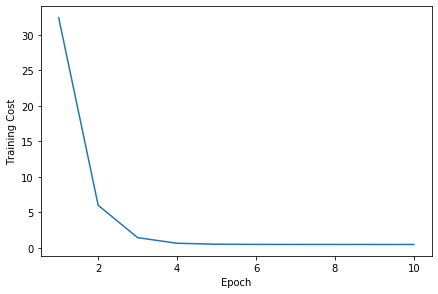

In [23]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(training_costs) + 1), training_costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training Cost')
plt.show()

훈련 데이터에서 학습된 선형 회귀 곡선

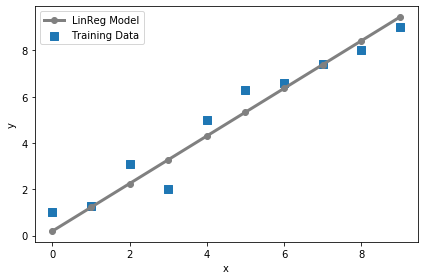

In [24]:
plt.scatter(x_train, y_train,
            marker='s', s=50,
            label='Training Data')
plt.plot(range(x_train.shape[0]),
         lrmodel.predict(x_train),
         color='gray', marker='o',
         markersize=6, linewidth=3,
         label='LinReg Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

## 13.2 tf.keras API로 다층 신경망 훈련

케라스는 텐서플로와 비슷하게 GPU를 사용해 신경망 훈련 가속 가능.

### 13.2.1 훈련 데이터 준비

**MNIST 데이터셋의 손글씨 숫자를 분류하는 다층 퍼셉트론 구현**

In [17]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

표준화 작업 : 평균을 0으로 만들고 표준 편차로 나눠줌

In [21]:
import numpy as np

mean_vals = np.mean(x_train, axis=0)
std_vals = np.std(x_train)

x_train_centered = (x_train - mean_vals) / std_vals
x_test_centered = (x_test - mean_vals) / std_vals

x_train_centered = np.reshape(x_train_centered, (60000, 784))
x_test_centered = np.reshape(x_test_centered, (10000, 784))

print(x_train_centered.shape, y_train.shape)
print(x_test_centered.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [22]:
np.random.seed(123) # 일관된 결과를 만들기 위한 난수 초깃값 설정

원-핫 인코딩 변경 : 훈련 데이터를 준비하기 위해 클래스 레이블(0~9 사이 정수)

In [23]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)

print('처음 3개 레이블 : ', y_train[:3])
print('\n처음 3개 레이블 (원-핫) : \n', y_train_onehot[:3])

처음 3개 레이블 :  [5 0 4]

처음 3개 레이블 (원-핫) : 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


to_catecorical 함수는 입력 텐서에서 가장 큰 정수를 찾아 원-핫 인코딩 크기 결정. 

num_classes 매개변수를 사용하여 입력의 최댓값보다 더 큰 원-핫 인코딩 생성 가능.

### 13.2.2 피드포워드 신경망 구성

간단한 신경망을 구현하기 위해 세 개의 완전 연결된 층을 생성.

처음 두 개의 층은 하이퍼볼릭 탄젠트(tanh) 활성화 함수를 가진 50개의 은닉 유닛으로 이룽어짐.

마지막 층은 열 개의 클래스 레이블에 해당하는 열 개의 은닉 유닛. 그리고 각 클래스의 확률을 계산하기 위해 소프트맥스(softmax) 함수 사용. 

In [24]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Dense(
        units=50,
        input_dim=x_train_centered.shape[1],
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(
    tf.keras.layers.Dense(
        units=50,
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(
    tf.keras.layers.Dense(
        units=y_train_onehot.shape[1],
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='softmax'))

Sequential 클래스를 사용해 피드포워드 신경망을 구현하는 새로운 모델 초기화.

처음 추가한 층은 입력층과 연결되기 때문에 input_dim 속성이 훈련 세트에 있는 특성(열) 개수와 일치해야 함.

두 개의 연속된 층에서 출력 유닛(units)과 입력 유닛(input_dim)이 일치해야 함.

출력층의 유닛 개수는 고유한 클래스 레이블의 개수와 같아야 함. (원-핫 인코딩된 클래스 레이블 배열의 열 개수)

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


summary() 메서드를 사용해 출력해보면 출력의 시작 부분이 신경망 입력에 가까운 층이고 끝부분이 신경망 출력에 가까운 층.

### 13.2.3 피드포워드 신경망 훈련

모델 구성을 마치려면 훈련을 수행하기 전에 모델을 컴파일 해야 함. 

이 단계에서 최적화할 손실 함수를 정의하고 최적화에 사용할 경사 하강법 옵티마이저 선택. (확률적 경사 하강법 최적화 선택)

에포크마다 학습률을 조절하기 위한 학습률 감쇠 상수와 모멘텀 값 지정. 

마지막 비용 함수 또는 손실 함수를 categorical_crossentropy로 설정. 

이진 크로스 엔트로피는 로지스틱 손실 함수의 기술적인 표현.

범주형 크로스 엔트로피는 소프트맥스를 사용해 다중 클래스 예측을 일반화한 것. 

In [26]:
sgd_optimizer = tf.keras.optimizers.SGD(
    lr=0.001, decay=1e-7, momentum=.9)

model.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy')

모델을 컴파일 후 fit 메서드를 호출해 미니 배치 경사 하강법을 사용해 훈련.

배치마다 담긴 훈련 샘플 개수는 64개로, 50번의 에포크 동안 MLP를 훈련. 

(verbose=1로 설정하면 훈련하는 동안 비용 함수의 최적화 과정을 볼 수 있음.)

validation_split 매개변수를 0.1로 설정하면 훈련 데이터의 10%를 검증 데이터로 사용 가능하다. 이 데이터로 검증 점수를 계산하므로 모델이 과대적합되었는지 모니터링 가능.

In [27]:
history = model.fit(x_train_centered, y_train_onehot,
                    batch_size=64, epochs=50,
                    verbose=1,
                    validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 3s 47us/sample - loss: 0.7263 - val_loss: 0.3604
Epoch 2/50
54000/54000 [==============================] - 2s 42us/sample - loss: 0.3663 - val_loss: 0.2745
Epoch 3/50
54000/54000 [==============================] - 2s 31us/sample - loss: 0.3017 - val_loss: 0.2386
Epoch 4/50
54000/54000 [==============================] - 2s 28us/sample - loss: 0.2665 - val_loss: 0.2143
Epoch 5/50
54000/54000 [==============================] - 2s 42us/sample - loss: 0.2424 - val_loss: 0.1984
Epoch 6/50
54000/54000 [==============================] - 2s 31us/sample - loss: 0.2236 - val_loss: 0.1849
Epoch 7/50
54000/54000 [==============================] - 2s 28us/sample - loss: 0.2080 - val_loss: 0.1742
Epoch 8/50
54000/54000 [==============================] - 2s 28us/sample - loss: 0.1951 - val_loss: 0.1661
Epoch 9/50
54000/54000 [==============================] - 2s 45us/sample - loss: 0.1836 - val_l

클래스 레이블 예측) predict_classes 메서드를 사용해 정수로 된 클래스 레이블 출력 가능. 

In [28]:
y_train_pred = model.predict_classes(x_train_centered)
print('처음 3개 예측 : ', y_train_pred[:3])

처음 3개 예측 :  [5 0 4]


훈련 세트와 테스트 세트에서 모델 정확도 출력

In [30]:
y_train_pred = model.predict_classes(x_train_centered)
correct_preds = np.sum(y_train == y_train_pred, axis=0)
train_acc = correct_preds / y_train.shape[0]

print('처음 3개 예측 : ', y_train_pred[:3])

print('훈련 정확도 : %.2f%%' % (train_acc * 100))

y_test_pred = model.predict_classes(x_test_centered)
correct_preds = np.sum(y_test == y_test_pred, axis=0)
test_acc = correct_preds / y_test.shape[0]

print('테스트 정확도 : %.2f%%' % (test_acc * 100))

처음 3개 예측 :  [5 0 4]
훈련 정확도 : 98.91%
테스트 정확도 : 96.28%


## 13.3 다층 신경망의 활성화 함수 선택

미분이 가능하면 어떤 함수라도 다층 신경망의 활성화 함수로 사용이 가능. 

선형 활성화 함수도 사용이 가능하지만 은닉층이나 출력층에 선형 활성화 함수를 사용하는 것이 유용하지는 않음. 

선형 함수를 합치면 결국 하나의 선형 함수가 되기 때문.

-> 따라서 복잡한 문제를 해결하기 위해서는 일반적인 인공 신경망에 비선형성이 필요. 

로지스틱 활성화 함수는 큰 음수 입력이 들어오면 시그모이드 함수의 출력이 0에 가까워지기 때문에 문제가 됨.

시그모이드 함수가 0에 가까운 출력을 내면 신경망이 매우 느리게 학습해 훈련 과정에서 지역 최솟값에 갇힐 가능성이 높아짐.

-> 따라서 은닉층에 하이퍼볼릭 탄젠트 함수를 선호함. 

### 13.3.1 로지스틱 함수 요약

시그모이드 함수라고 불리는 로지스틱 함수는 시그모이드 함수의 특별한 경우. 

예) 2차원 데이터 포인트 x와 가중치 벡터 w로 구성된 모델 가정

In [31]:
import numpy as np

x = np.array([1, 1.4, 2.5]) # 첫 번째 원소는 1이어야 함.
w = np.array([0.4, 0.3, 0.5])

def net_input(x, w):
    return np.dot(x, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(x, w):
    z = net_input(x, w)
    return logistic(z)

print('P(y=1 | x) = %.3f' % logistic_activation(x, w))

P(y=1 | x) = 0.888


결과) 샘플 x가 양성 클래스에 속할 확률이 88.8%

원-핫 인코딩 기법을 사용하지 않고 여러 개의 로지스틱 활성화 유닛으로 구성된 출력층은 의미 있게 해석할 만한 확률 값을 만들지 못함.

In [32]:
# 첫 번째 열은 절편 유닛

W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

# 첫 번째 열은 1

A = np.array([1, 0.1, 0.4, 0.6])

Z = np.dot(W, A[0])
y_probas = logistic(Z)

print('최종 입력 : \n', Z)
print('출력 유닛 : \n', y_probas)

최종 입력 : 
 [[1.1 1.2 0.8 0.4]
 [0.2 0.4 1.  0.2]
 [0.6 1.5 1.2 0.7]]
출력 유닛 : 
 [[0.75026011 0.76852478 0.68997448 0.59868766]
 [0.549834   0.59868766 0.73105858 0.549834  ]
 [0.64565631 0.81757448 0.76852478 0.66818777]]


클래스가 여러 개일 때 결과 확률을 이해하기 어렵다. 값의 합이 1이 아니기 때문. 

여기서 클래스 레이블을 예측하는 방법은 가장 큰 값을 선택하는 것.

In [34]:
y_class = np.argmax(Z, axis=0)
print('예측 클래스 레이블 : ', y_class)

예측 클래스 레이블 :  [0 2 2 2]


### 13.3.2 소프트맥스 함수를 사용하여 다중 클래스 확률 예측

소프트맥스 함수는 argmax처럼 하나의 클래스 인덱스를 찾는 대신 각 클래스의 확률을 반환. 

softmax 함수는 특정 샘플의 최종 입력이 z일 때 i번째 클래스에 속할 확률을 M개의 선형 함수로 나누어 정규화한 것. 

In [36]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('확률 : \n', y_probas)

확률 : 
 [[0.10603349 0.11718513 0.07855154 0.05265467]
 [0.04311    0.05265467 0.09594307 0.04311   ]
 [0.06431256 0.15818338 0.11718513 0.07107637]]


In [37]:
np.sum(y_probas)

1.0

### 13.3.3 하이퍼볼릭 탄젠트로 출력 범위 넓히기

인공 신경망의 은닉층에 많이 사용하는 또 다른 시그모이드 함수는 하이퍼볼릭 탄젠트(tanh).

하이퍼볼릭 탄젠트 함수의 장점은 출력 범위를 (-1, 1) 사이로 넓혀 역전파 알고리즘의 수렴을 향상시킬 수 있는 장점. 

**로지스틱 함수와 하이퍼볼릭 탄젠트 비교를 위한 그래프**

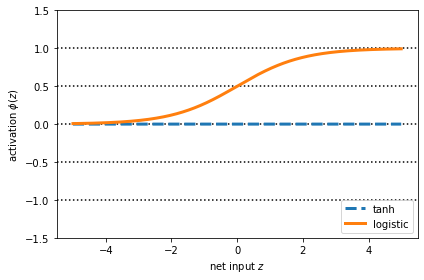

In [41]:
import matplotlib.pyplot as plt

def tanh(z):
    e_p = np.exp(-z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)

log_act = logistic(z)
tanh_act = tanh(z)

plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=":")
plt.axhline(0.5, color='black', linestyle=":")
plt.axhline(0, color='black', linestyle=":")
plt.axhline(-0.5, color='black', linestyle=":")
plt.axhline(-1, color='black', linestyle=":")

plt.plot(z, tanh_act,
         linewidth=3, 
         linestyle='--',
         label='tanh')
plt.plot(z, log_act,
         linewidth=3,
         label='logistic')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

결과) tanh 함수가 logistic 함수보다 2배 큰 출력 범위를 가짐. 

### 13.3.4 렐루 활성화 함수

렐루는 심층 신경망에 자주 사용되는 또 다른 활성화 함수

렐루는 신경망이 복잡한 함수를 학습하기에 좋은 비선형 함수. 

입력 값이 양수면 입력에 대한 렐루의 도함수는 항상 1 -> 그래디언트 소실 문제를 해결해주기 때문에 심층 신경망에 적합